In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from extract import extract
from transform import transform
from load import load

extract()
transform()
load()

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from config import TARGET_PATH
from config import FOLDER_NAME
from load import OWID_FILE_NAME

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

OWID_COLUMNS = [
    'iso_code', 'continent', 'location', 'date',
    
    'total_cases', 'total_cases_normalized',
    'total_deaths', 'total_deaths_normalized', 
    
    'new_cases', 'new_cases_smoothed', 'new_cases_smoothed_normalized', 'new_cases_smoothed_standardized',
    'new_deaths', 'new_deaths_smoothed', 'new_deaths_smoothed_normalized', 'new_deaths_smoothed_standardized',
    'people_vaccinated', 'people_vaccinated_interpolated', 
    'people_vaccinated_interpolated_normalized', 'people_vaccinated_interpolated_standardized', 
    'people_fully_vaccinated', 'people_fully_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated_normalized', 'people_fully_vaccinated_interpolated_standardized',
    
    'hosp_patients', 'hosp_patients_per_million', 'hosp_patients_normalized', 'hosp_patients_standardized'
]

NORMALIZE_COLUMNS = [
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'total_deaths',
    'total_cases',
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated',
    'hosp_patients'
]

STANDARDIZE_COLUMNS = [
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated',
    'hosp_patients'
]

def normalize_columns(df):
    for col in NORMALIZE_COLUMNS:
        new_col = col + '_normalized'
        df[new_col] = MinMaxScaler().fit_transform(df[col].values.reshape(-1, 1))
    return df

def standardize_columns(df):
    for col in STANDARDIZE_COLUMNS:
        new_col = col + '_standardized'
        df[new_col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))
    return df

file_path = os.path.join(TARGET_PATH, FOLDER_NAME, OWID_FILE_NAME)
df = pd.read_csv(file_path)
df = df[OWID_COLUMNS].fillna(0)
#df = df[(df['date'] > '2021-01-01') & (df['date'] < '2021-10-25')]
df = df[(df['date'] < '2021-10-25')]
df = normalize_columns(df)
df = standardize_columns(df)

In [15]:
rename_map = {
    'total_cases': 'Ukupno slučajeva',
    'total_cases_normalized': 'Ukupno slučajeva (normalizirano)',
    'total_deaths': 'Ukupno smrti',
    'total_deaths_normalized': 'Ukupno smrti (normalizirano)',
    
    'new_cases': 'Novi slučajevi',
    'new_cases_smoothed': 'Novi slučajevi (zaglađeno)',
    'new_cases_smoothed_normalized': 'Novi slučajevi (normalizirano)',
    'new_cases_smoothed_standardized': 'Novi slučajevi (standardizirano)',
    'new_deaths': 'Nove smrti',
    'new_deaths_smoothed': 'Nove smrti (zaglađeno)',
    'new_deaths_smoothed_normalized': 'Nove smrti (normalizirano)',
    'new_deaths_smoothed_standardized': 'Nove smrti (standardizirano)',
    
    'people_vaccinated': 'Cijepljeni (1 doza)',
    'people_vaccinated_interpolated': 'Cijepljeni (1 doza) (interpolirano)',
    'people_vaccinated_interpolated_normalized': 'Cijepljeni (1 doza) (normalizirano)',
    'people_vaccinated_interpolated_standardized': 'Cijepljeni (1 doza) (standardizirano)',
    'people_fully_vaccinated': 'Cijepljeni (2 doze)',
    'people_fully_vaccinated_interpolated': 'Cijepljeni (2 doze) (interpolirano)',
    'people_fully_vaccinated_interpolated_normalized': 'Cijepljeni (2 doze) (normalizirano)',
    'people_fully_vaccinated_interpolated_standardized': 'Cijepljeni (2 doze) (standardizirano)',

    'hosp_patients': 'Hospitalizirani',
    'hosp_patients_per_million': 'Hospitalizirani na 1M',
    'hosp_patients_normalized': 'Hospitalizirani (normalizirano)',
    'hosp_patients_standardized': 'Hospitalizirani (standardizirano)'
}

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 28 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   iso_code                                           297 non-null    object 
 1   continent                                          297 non-null    object 
 2   location                                           297 non-null    object 
 3   date                                               297 non-null    object 
 4   total_cases                                        297 non-null    float64
 5   total_cases_normalized                             297 non-null    float64
 6   total_deaths                                       297 non-null    float64
 7   total_deaths_normalized                            297 non-null    float64
 8   new_cases                                          297 non-null    float64
 9   new_cases_

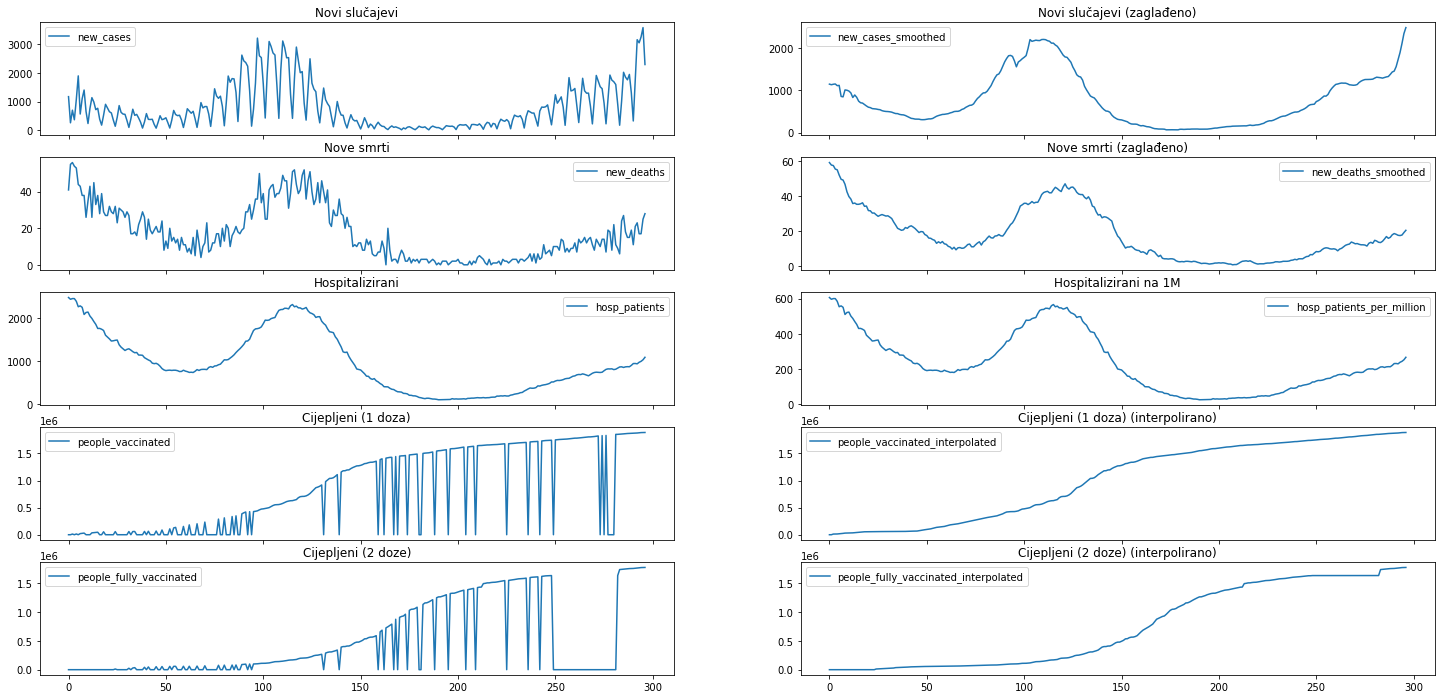

In [38]:
columns_to_check = np.array([
    np.array(['new_cases', 'new_cases_smoothed']),
    np.array(['new_deaths', 'new_deaths_smoothed']),
    np.array(['hosp_patients', 'hosp_patients_per_million']),
    np.array(['people_vaccinated', 'people_vaccinated_interpolated']),
    np.array(['people_fully_vaccinated', 'people_fully_vaccinated_interpolated']),
])

shapex, shapey = columns_to_check.shape
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(5*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    # title = ' i '.join([rename_map[col] for col in columns])
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        ax[i, j].set_title(rename_map[column])
        ax[i, j].legend([column])


## Skaliranje podataka

**Standardiziranje** varijabli `new_cases_smoothed`, `new_deaths_smoothed` i `hosp_patients` zbog naizgled normalne razdiobe podataka.  
**Normaliziranje** varijabli `total_cases`, `total_deaths`, `people_vaccinated_interpolated` i `people_fully_vaccinated_interpolated` zbog ne-normalne razdiobe podataka.

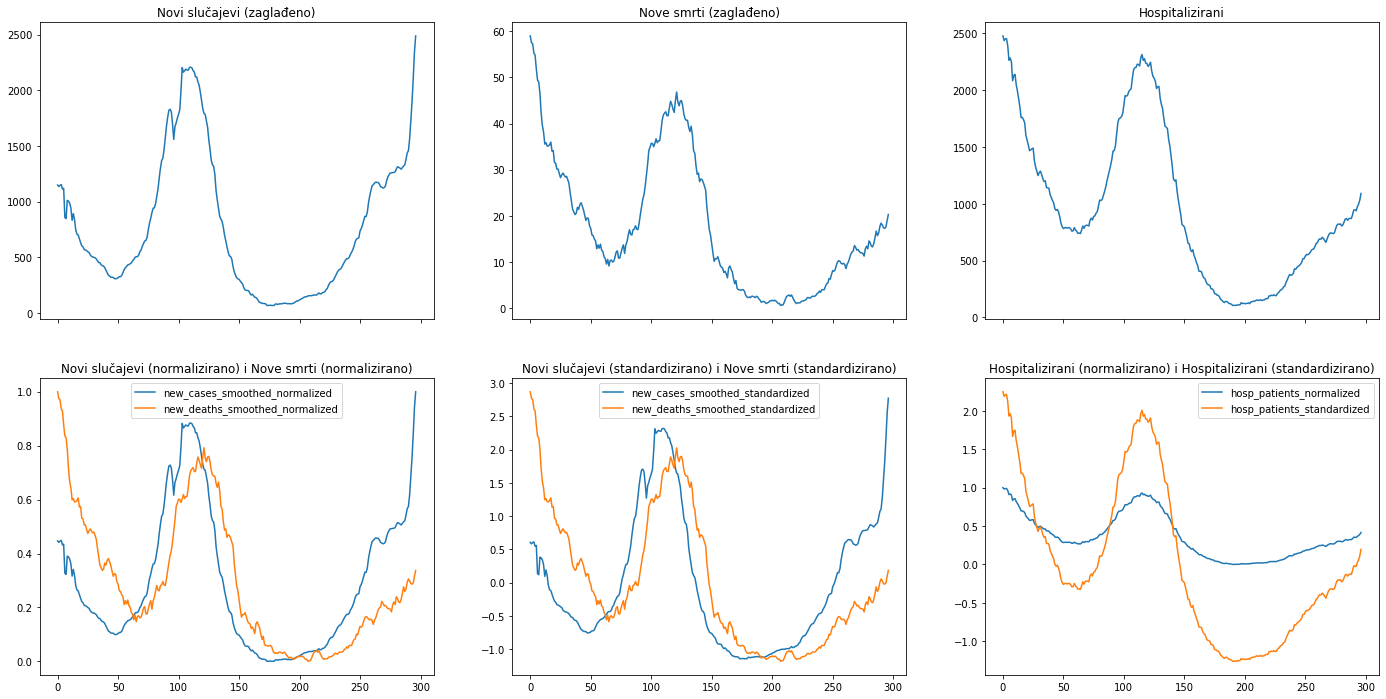

In [39]:
columns_to_check = [
    ['new_cases_smoothed', 'new_deaths_smoothed', 'hosp_patients'],
    [
        ['new_cases_smoothed_normalized', 'new_deaths_smoothed_normalized'],
        ['new_cases_smoothed_standardized', 'new_deaths_smoothed_standardized'],
        ['hosp_patients_normalized', 'hosp_patients_standardized']
    ]
]

shapex, shapey = len(columns_to_check), len(columns_to_check[0])
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(12*shapex, 4*shapey))
for i, columns in enumerate(columns_to_check):
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        if isinstance(column, list):
            title = " i ".join([rename_map[col] for col in column])
        else:
            title = rename_map[column]
        ax[i, j].set_title(title)


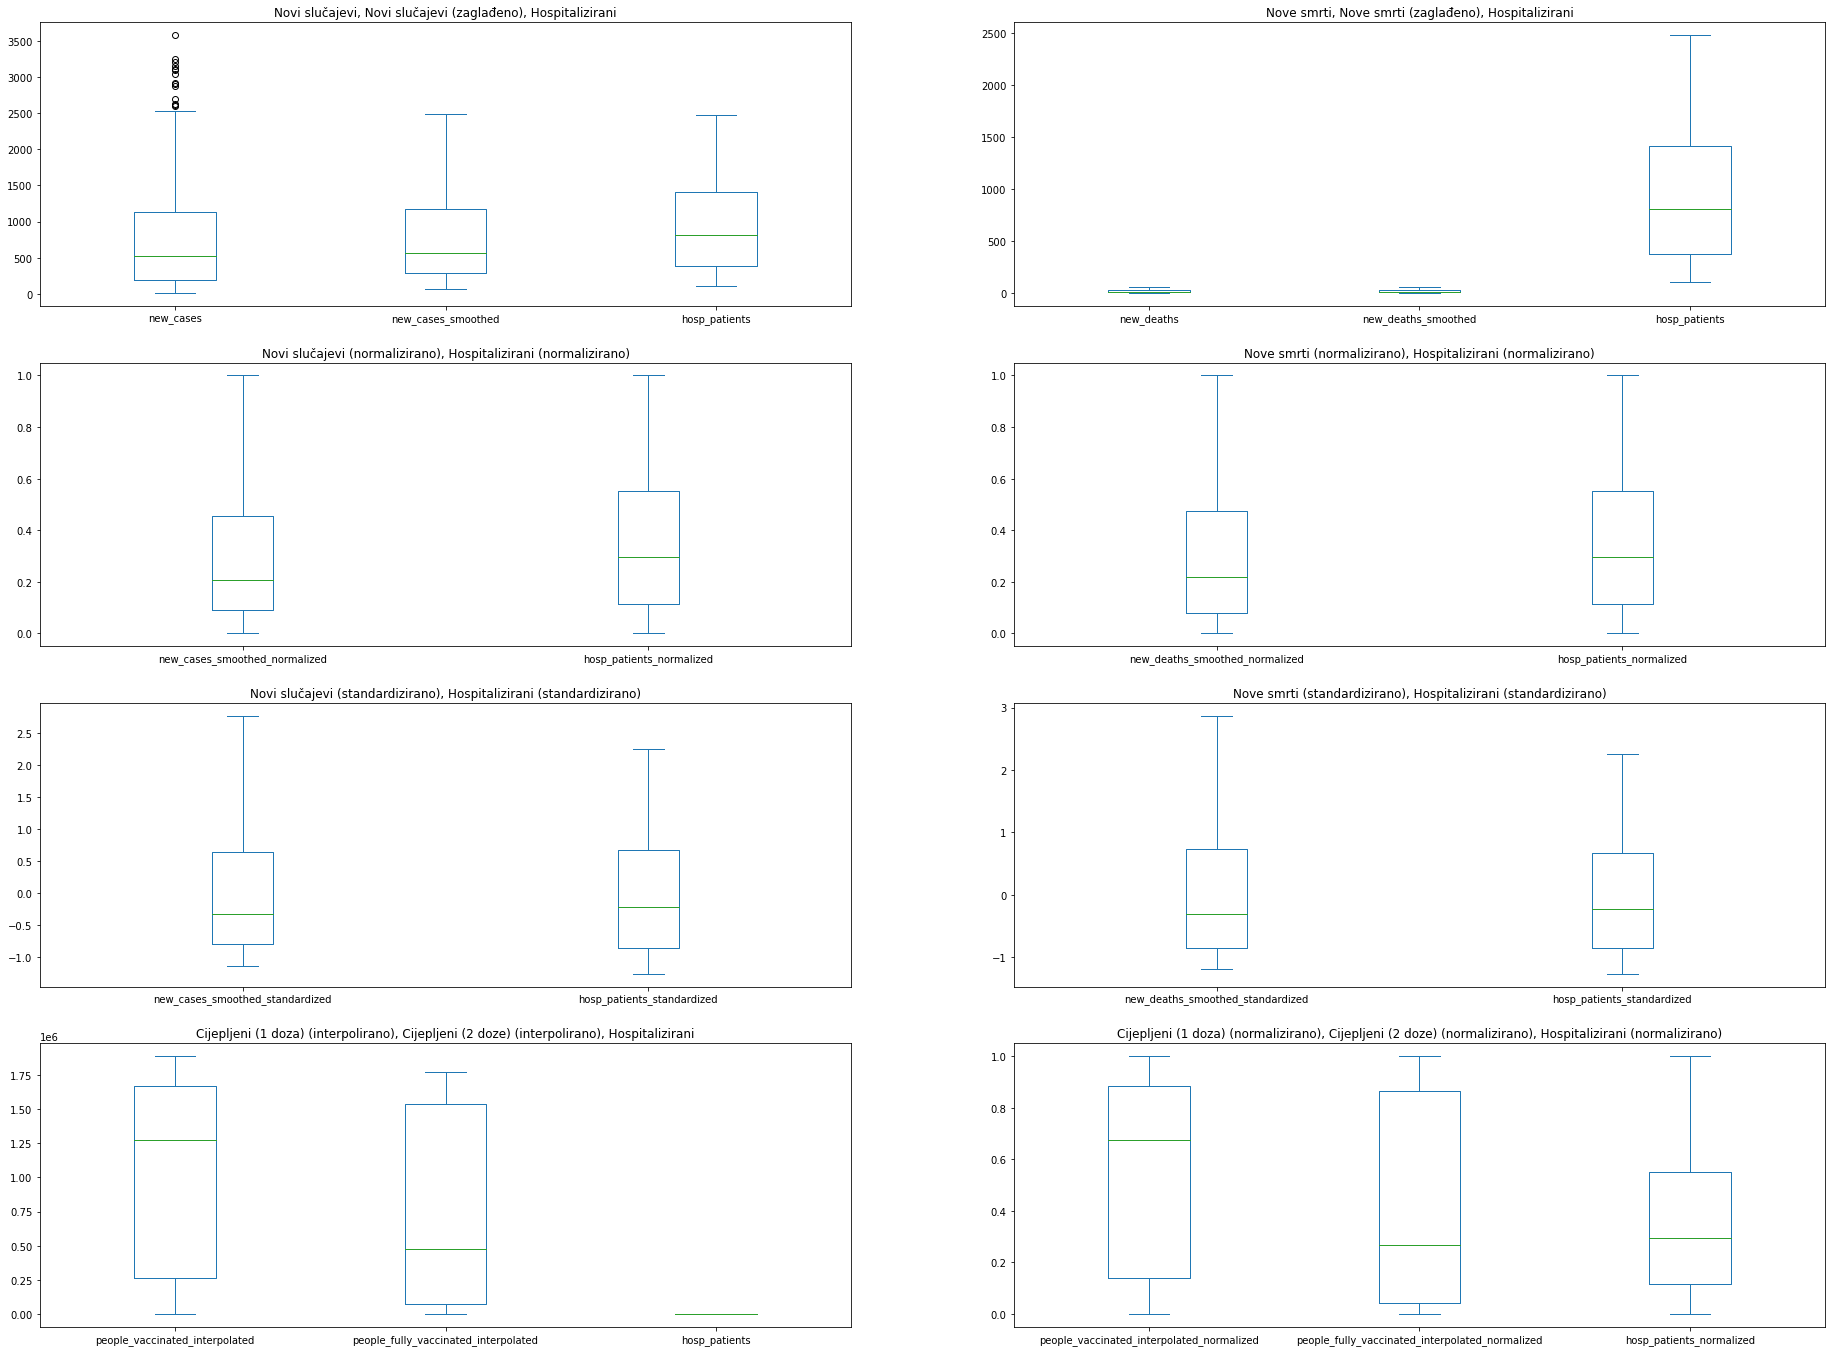

In [41]:
columns_to_check = [
    ['new_cases', 'new_cases_smoothed', 'hosp_patients'],
    ['new_deaths', 'new_deaths_smoothed', 'hosp_patients'],
    ['new_cases_smoothed_normalized', 'hosp_patients_normalized'],
    ['new_deaths_smoothed_normalized', 'hosp_patients_normalized'],
    ['new_cases_smoothed_standardized', 'hosp_patients_standardized'],
    ['new_deaths_smoothed_standardized', 'hosp_patients_standardized'],
    ['people_vaccinated_interpolated', 'people_fully_vaccinated_interpolated', 'hosp_patients'],
    ['people_vaccinated_interpolated_normalized', 'people_fully_vaccinated_interpolated_normalized', 'hosp_patients_normalized'],
]

shapex, shapey = 4, 2
fig, ax = plt.subplots(shapex, shapey, figsize=(8*shapex, 12*shapey))
for i, columns in enumerate(columns_to_check):
    df[columns].plot(kind='box', ax=ax[i//2, i%2])
    title = ", ".join([rename_map[col] for col in columns])
    ax[i//2, i%2].set_title(title)

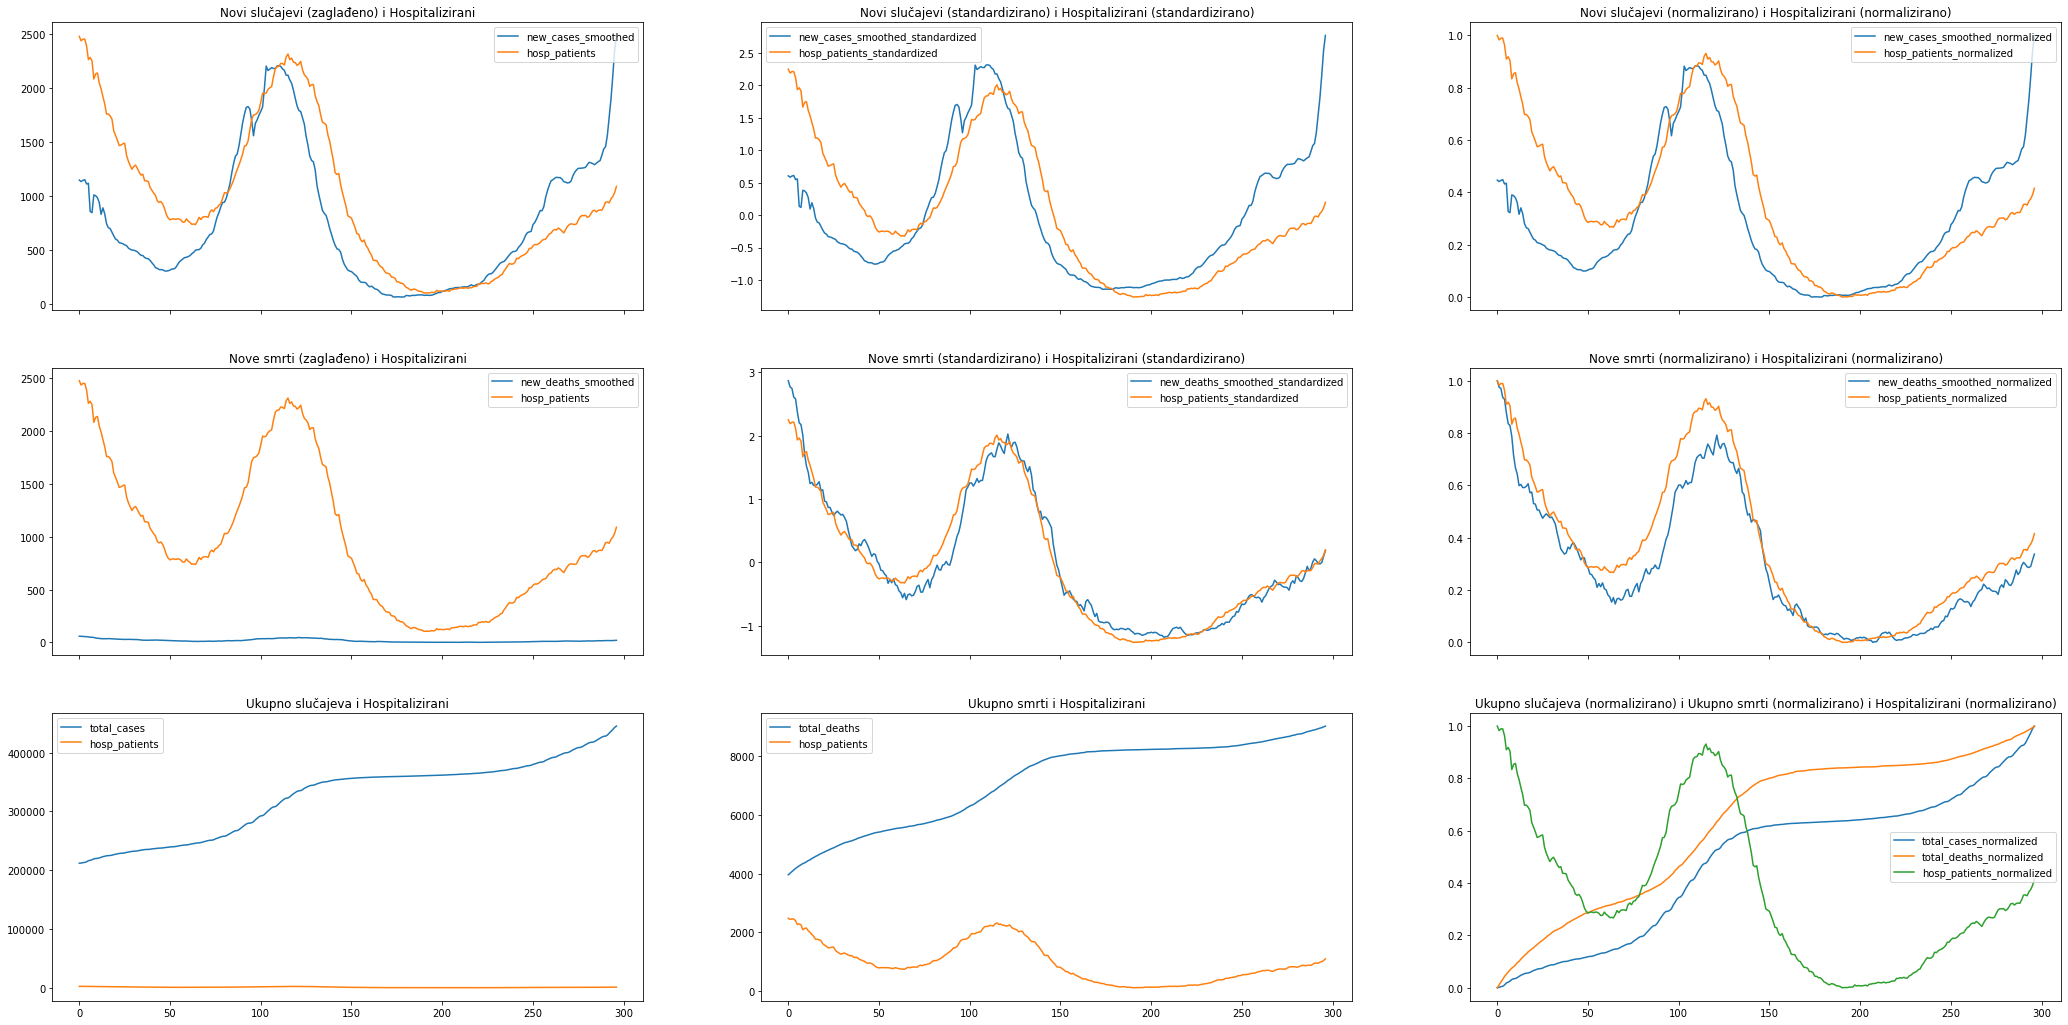

In [44]:
columns_to_check = [
    [
        ['new_cases_smoothed', 'hosp_patients'],
        ['new_cases_smoothed_standardized', 'hosp_patients_standardized'],
        ['new_cases_smoothed_normalized', 'hosp_patients_normalized'],
    ],
    [
        ['new_deaths_smoothed', 'hosp_patients'],
        ['new_deaths_smoothed_standardized', 'hosp_patients_standardized'],
        ['new_deaths_smoothed_normalized', 'hosp_patients_normalized'],
    ],
    [
        ['total_cases', 'hosp_patients'],
        ['total_deaths', 'hosp_patients'],
        ['total_cases_normalized', 'total_deaths_normalized', 'hosp_patients_normalized'],
    ]
]

shapex, shapey = len(columns_to_check), len(columns_to_check[0])
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(12*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        if isinstance(column, list):
            title = " i ".join([rename_map[col] for col in column])
        else:
            title = rename_map[column]
        ax[i, j].set_title(title)


Nove smrti i novi slučajevi su varijable s visokom korelacijom. U nastavku, analizira se korelacija novih slučajeva s brojem hospitaliziranih (`new_cases_smoothed` i `hosp_patients`) te korelacija standardiziranih novih smrti s brojem hospitaliziranih (`new_deaths_smoothed_standardized` i `hosp_patients_standardized`). Na zadnjem grafu vidimo da ne postoji korelacija između broja hospitaliziranih i ukupnog broja slučajeva/smrti.

<AxesSubplot:>

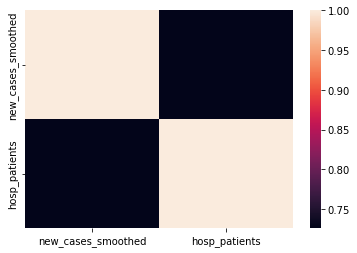

In [46]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed',
    'hosp_patients', 
]].corr()
sns.heatmap(corr_df)

<AxesSubplot:>

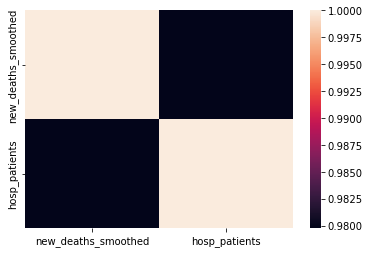

In [51]:
import seaborn as sns

corr_df = df[[
    'new_deaths_smoothed',
    'hosp_patients', 
]].corr()
sns.heatmap(corr_df)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_name = 'hosp_patients'
y_name = 'new_cases_smoothed'

poly_reg_new_cases = PolynomialFeatures(degree=3)
X = df[X_name].values.reshape(-1, 1)
X = poly_reg_new_cases.fit_transform(X)
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr_new_cases = LinearRegression()
#lr = Ridge()
#lr = Lasso(alpha=1)
lr_new_cases.fit(X_train, y_train)

train_score = lr_new_cases.score(X_train, y_train)
test_score = lr_new_cases.score(X_test, y_test)
#mae = mean_absolute_error(y_test, lr_new_cases.predict(poly_reg_new_cases.transform(X_test)))
#mse = mean_squared_error(y_test, lr_new_cases.predict(poly_reg_new_cases.transform(X_test)))

print("Training score: {}".format(round(train_score, 2)))
print("Testing score: {}".format(round(test_score, 2)))
#print("Mean Absolute Error: {}".format(round(mae, 2)))
#print("Mean Squared Error: {}".format(round(mse, 2)))

Training score: 0.57
Testing score: 0.46


In [58]:
X_name = 'hosp_patients'
y_name = 'new_deaths_smoothed'

poly_reg_new_deaths = PolynomialFeatures(degree=2)
X = df[X_name].values.reshape(-1, 1)
X = poly_reg_new_deaths.fit_transform(X)
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr_new_deaths = LinearRegression()
#lr = Ridge()
#lr = Lasso(alpha=1)
lr_new_deaths.fit(X_train, y_train)

train_score = lr_new_deaths.score(X_train, y_train)
test_score = lr_new_deaths.score(X_test, y_test)
#mae = mean_absolute_error(y_test, lr_new_deaths.predict(poly_reg_new_deaths.transform(X_test)))
#mse = mean_squared_error(y_test, lr_new_deaths.predict(poly_reg_new_deaths.transform(X_test)))

print("Training score: {}".format(round(train_score, 2)))
print("Testing score: {}".format(round(test_score, 2)))
#print("Mean Absolute Error: {}".format(round(mae, 2)))
#print("Mean Squared Error: {}".format(round(mse, 2)))

Training score: 0.96
Testing score: 0.96


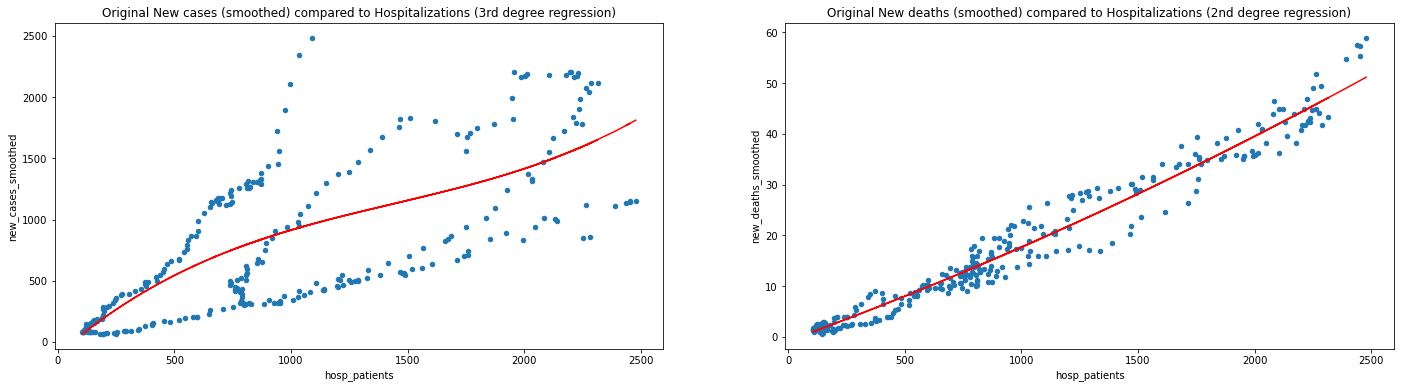

In [59]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('Original New cases (smoothed) compared to Hospitalizations (3rd degree regression)')
ax[1].set_title('Original New deaths (smoothed) compared to Hospitalizations (2nd degree regression)')

df[[
    'new_cases_smoothed',
    'hosp_patients'
]].plot(x='hosp_patients', y='new_cases_smoothed', kind='scatter', ax=ax[0])
ax[0].plot(df['hosp_patients'], lr_new_cases.predict(poly_reg_new_cases.transform(df['hosp_patients'].values.reshape(-1, 1))), 'r')

df[[
    'new_deaths_smoothed',
    'hosp_patients'
]].plot(x='hosp_patients', y='new_deaths_smoothed', kind='scatter', ax=ax[1])
ax[1].plot(df['hosp_patients'], lr_new_deaths.predict(poly_reg_new_deaths.transform(df['hosp_patients'].values.reshape(-1, 1))), 'r')


In [60]:
diffs = df['hosp_patients'].diff()
avg_vacc_per_week = diffs.tail(7).mean()
X_predict = np.array([df['hosp_patients'].max() + (vacc * (i+1)) for i, vacc in enumerate([avg_vacc_per_week] * 100)])

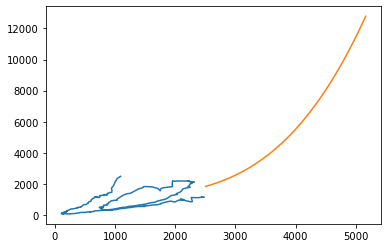

In [63]:
plt.plot(df['hosp_patients'], df['new_cases_smoothed'])
plt.plot(X_predict, lr_new_cases.predict(poly_reg_new_cases.transform(X_predict.reshape(-1, 1))))

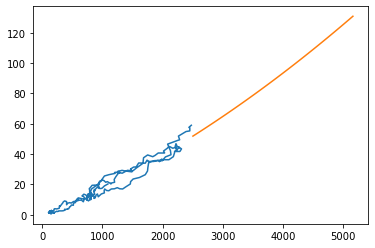

In [64]:
plt.plot(df['hosp_patients'], df['new_deaths_smoothed'])
plt.plot(X_predict, lr_new_deaths.predict(poly_reg_new_deaths.transform(X_predict.reshape(-1, 1))))